#### Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import time
import itertools

## Import .py
from HyperparameterSearch import Experimentacion_modelo
from soft_svm import SoftSVM, OVO_SVM, OVR_SVM
from RandomForest import RandomForest

In [2]:
def generate_csv(Y_pred, name_csv="predicctions.csv"):
    # Convertir el arreglo a un DataFrame de Pandas
    df_prediccion = pd.DataFrame({"y": Y_pred})

    # Crear una serie de Pandas con IDs incrementales
    ids = pd.Series(range(1, len(df_prediccion) + 1), name="ID")

    # Insertar la serie de IDs
    df_prediccion.insert(0, "ID", ids)

    # ruta
    name_csv = f"./predicctions/{name_csv}"
    df_prediccion.to_csv(name_csv, index=False)

## Cargando data con feattures extraidos

In [3]:
# cargando el csv de train
df_train = pd.read_csv('./data_final/match_ef_forest.csv')
df_test = pd.read_csv('./data_final/test_match_forest.csv')

In [4]:
# extraer x y las etiquetas y
X = df_train.to_numpy()[:, :-1]
Y = df_train.to_numpy()[:,-1]
X_TEST = df_test.to_numpy()[:,:]

# normalizar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(X)
x_test = scaler.transform(X_TEST)

y_train = Y

# Asegurar que y son enteros
y_train = y_train.astype(int)

# Experimentación

#### Modelos

* Modelo 1: Random Forest
* Modelo 2: SOFT SVM OVO
* Modelo 3: SOFT SVM OVR
* Modelo 4: 

## Evaluación de modelos

### Modelo 1: RANDOM FOREST

In [6]:
# Experimentacion
model_random_forest = RandomForest()
# params to rf => n_trees=100, max_depth=None, min_samples_split=2, max_features='sqrt', n_jobs=1

rf_hyperparams = {
    "n_trees": [20,25],
    "max_depth": [10,15],
    "min_samples_split": [2],
    "max_features": ["sqrt"],
    "n_jobs": [4],
}
experiment_rf = Experimentacion_modelo(model_random_forest, rf_hyperparams, x_train, y_train, x_test, 5)

Mejores hiperparametros para Random Forest: 
 {'n_trees': 25, 'max_depth': 15, 'min_samples_split': 2, 'max_features': 'sqrt', 'n_jobs': 4}
Duración del exerimentación: 5853.983879566193 segundos


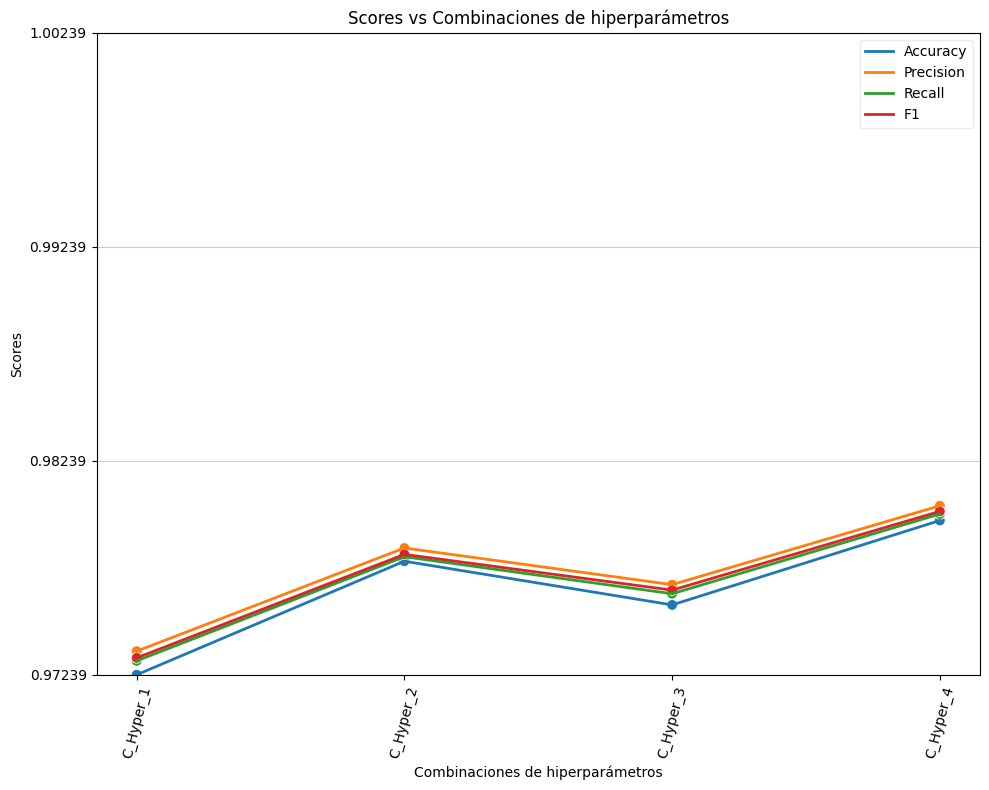

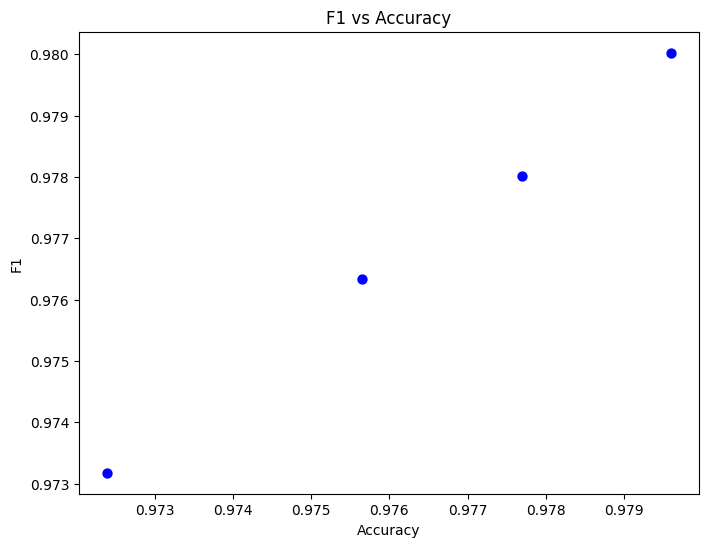

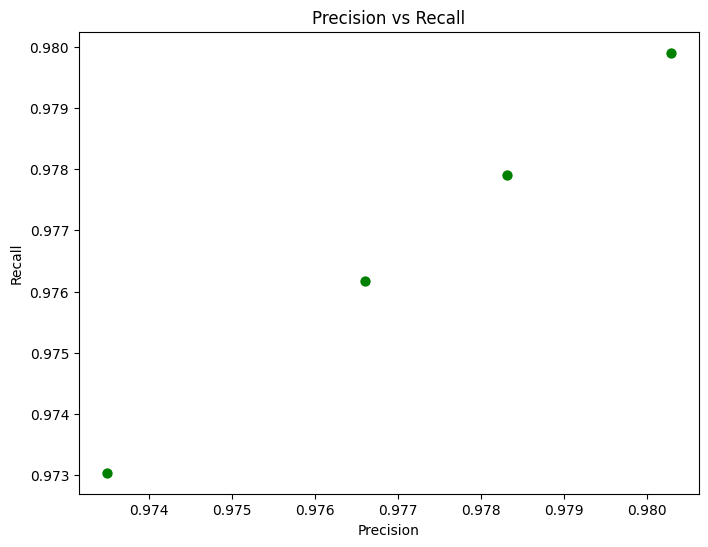

In [7]:
## Experimentacion
start_time = time.time()
best_hiper_rf = experiment_rf.experimentacion()
end_time = time.time()
print("Mejores hiperparametros para Random Forest: \n", best_hiper_rf)

exp_duration_rf = end_time - start_time
print("Duración del exerimentación:", exp_duration_rf, "segundos")

# plotear resultados de experimentacion para cada combinacion de hiperparametros
experiment_rf.plot_metrics()

# plotear f1 vs accuracy
experiment_rf.plot_f1_vs_accuracy()

# plotear precision vs recall
experiment_rf.plot_precision_vs_recall()

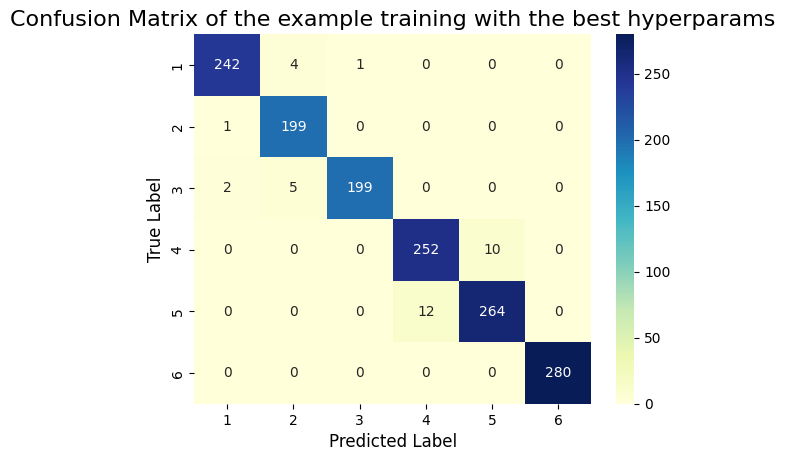

/home/dh/utec_2024_2/ml/Proyectos/venv/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


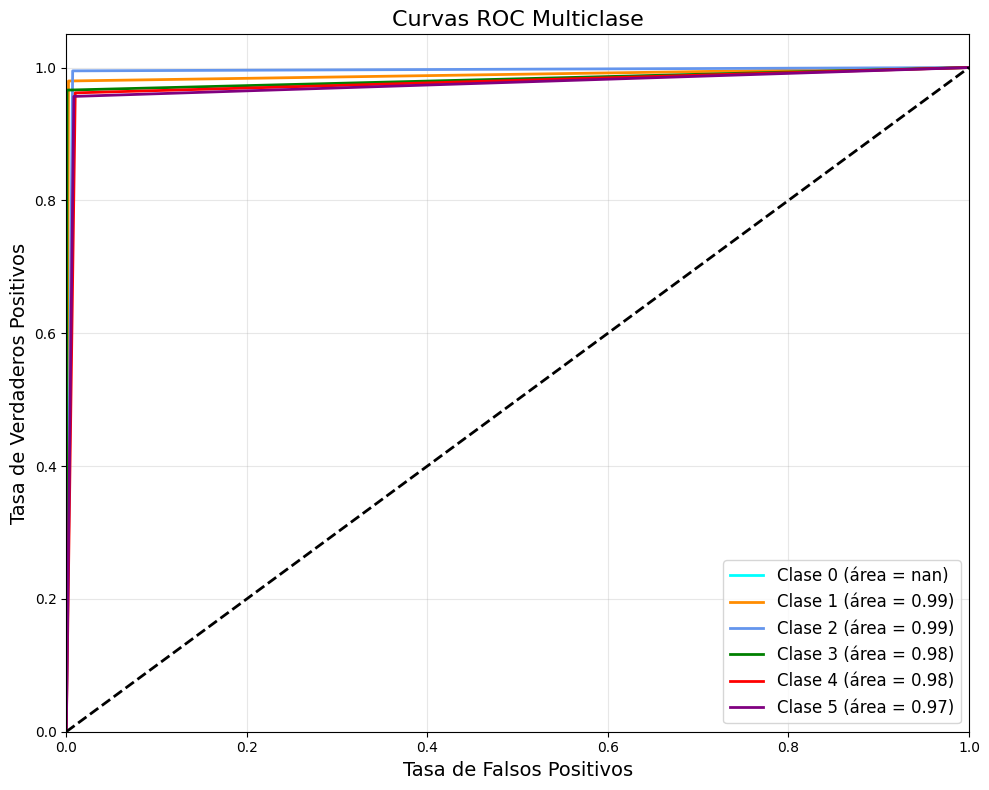

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [8]:
# plotear matriz de confusion and ROC
rf_model_temp = RandomForest()
matriz_confusion = experiment_rf.get_matrix_confusion(rf_model_temp, i=0)

In [10]:
print("Top 5")
for i, hiper in enumerate(experiment_rf.best_hiper):
    print(f"Hiperparametros {i+1}: ", hiper)
print()

reporte = experiment_rf.generater_reporte()
print(reporte.head(10))

Top 5
Hiperparametros 1:  [25, 15, 2, 'sqrt', 4]
Hiperparametros 2:  [20, 15, 2, 'sqrt', 4]
Hiperparametros 3:  [25, 10, 2, 'sqrt', 4]
Hiperparametros 4:  [20, 10, 2, 'sqrt', 4]

   Accuracy  Precision    Recall        F1       Hiperparametros
0  0.972388   0.973490  0.973040  0.973179  [20, 10, 2, sqrt, 4]
1  0.977694   0.978313  0.977905  0.978014  [20, 15, 2, sqrt, 4]
2  0.975653   0.976599  0.976175  0.976344  [25, 10, 2, sqrt, 4]
3  0.979598   0.980286  0.979902  0.980025  [25, 15, 2, sqrt, 4]


In [9]:
# Predicciones finales
# Con los mejores hyperparametros
experiment_rf.training_model(i=0)  # 0 porque es el top 1 en de un top 5 de best hiperparams
y_pred = experiment_rf.predict(x_test)

generate_csv(y_pred, name_csv="predicciones_rf_1.csv")

# Con 2do's mejores
experiment_rf.training_model(i=1)  # 0 porque es el top 1 en de un top 5 de best hiperparams
y_pred = experiment_rf.predict(x_test)

generate_csv(y_pred, name_csv="predicciones_rf_2.csv")


# Con los terceros
experiment_rf.training_model( i=0 )  # 0 porque es el top 1 en de un top 5 de best hiperparams
y_pred = experiment_rf.predict(x_test)

generate_csv(y_pred, name_csv="predicciones_rf_3.csv")